In [1]:
# % matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree

from L5.validation import confusion_matrix, print_scores

In [2]:
data = pd.read_csv("/home/lukasz/Pobrane/car.data", header=None)
data[:20]

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
# data = data.apply(lambda x: pd.Categorical(x).codes)

buying = ["vhigh", "high", "med", "low"]
maint = ["vhigh", "high", "med", "low"]
doors = ["2", "3", "4", "5more"]
persons = ["2", "4", "more"]
lug_boot = ["small", "med", "big"]
safety = ["low", "med", "high"]
attributes_values = (buying, maint, doors, persons, lug_boot, safety)

for i in range(6):
    data[i] = list(map(lambda attr: attributes_values[i].index(attr), data[i]))
data[:20]

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc
5,0,0,0,0,1,2,unacc
6,0,0,0,0,2,0,unacc
7,0,0,0,0,2,1,unacc
8,0,0,0,0,2,2,unacc
9,0,0,0,1,0,0,unacc


In [4]:
car_labels = data[6].values
car_data = data.drop([6], axis = 1).values

In [5]:
for max_leaf_nodes in range(10, 21, 2):
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    print_scores(classifier, car_data, car_labels, max_leaf_nodes)

10: 0.902199074074
[0.88372093023255816, 0.8497109826589595, 0.74566473988439308, 0.76878612716763006, 0.90173410404624277, 0.88372093023255816, 0.78612716763005785, 0.86127167630057799, 0.86127167630057799, 0.69942196531791911]
0.824143029977


12: 0.916087962963
[0.88372093023255816, 0.8497109826589595, 0.78034682080924855, 0.76878612716763006, 0.90173410404624277, 0.88372093023255816, 0.79190751445086704, 0.86127167630057799, 0.86127167630057799, 0.67052023121387283]
0.825299099341


14: 0.924189814815
[0.88372093023255816, 0.8497109826589595, 0.78034682080924855, 0.76878612716763006, 0.97687861271676302, 0.88372093023255816, 0.79190751445086704, 0.86127167630057799, 0.78612716763005785, 0.73410404624277459]
0.831657480844


16: 0.938078703704
[0.97674418604651159, 0.79190751445086704, 0.81502890173410403, 0.76878612716763006, 0.97687861271676302, 0.88372093023255816, 0.81502890173410403, 0.89595375722543358, 0.83236994219653182, 0.78034682080924855]
0.853676569431


18: 0.945023148

In [6]:
for min_samples_leaf in range(4, 21, 4):
    classifier = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    print_scores(classifier, car_data, car_labels, min_samples_leaf)

4: 0.990162037037
[0.9941860465116279, 0.80346820809248554, 0.96531791907514453, 0.78034682080924855, 0.98265895953757221, 0.96511627906976749, 0.82080924855491333, 0.82080924855491333, 0.83236994219653182, 0.87861271676300579]
0.884369538917


8: 0.974537037037
[0.97674418604651159, 0.79190751445086704, 0.95375722543352603, 0.76878612716763006, 0.98265895953757221, 0.93023255813953487, 0.82080924855491333, 0.79768786127167635, 0.79768786127167635, 0.86127167630057799]
0.868154321817


12: 0.958333333333
[0.97674418604651159, 0.79190751445086704, 0.78034682080924855, 0.76878612716763006, 0.97687861271676302, 0.93023255813953487, 0.76878612716763006, 0.83236994219653182, 0.82080924855491333, 0.77456647398843925]
0.842142761124


16: 0.958333333333
[0.97674418604651159, 0.78034682080924855, 0.78034682080924855, 0.76878612716763006, 0.97687861271676302, 0.90697674418604646, 0.76878612716763006, 0.82658959537572252, 0.83236994219653182, 0.78034682080924855]
0.839817179728


20: 0.938078703

In [7]:
for max_depth in range(4, 11, 2):
    classifier = tree.DecisionTreeClassifier(max_depth=max_depth)
    print_scores(classifier, car_data, car_labels, max_depth)

4: 0.850694444444
[0.86046511627906974, 0.76878612716763006, 0.74566473988439308, 0.75144508670520227, 0.90173410404624277, 0.88372093023255816, 0.67052023121387283, 0.75722543352601157, 0.8497109826589595, 0.69942196531791911]
0.788869471703


6: 0.934606481481
[0.88372093023255816, 0.8497109826589595, 0.81502890173410403, 0.76878612716763006, 0.90173410404624277, 0.95348837209302328, 0.81502890173410403, 0.89595375722543358, 0.83236994219653182, 0.76878612716763006]
0.848460814626


8: 0.976273148148
[0.98255813953488369, 0.80346820809248554, 0.96531791907514453, 0.78612716763005785, 0.97687861271676302, 0.96511627906976749, 0.86705202312138729, 0.8497109826589595, 0.83236994219653182, 0.89595375722543358]
0.892455303132


10: 0.993634259259
[0.9941860465116279, 0.78612716763005785, 0.9942196531791907, 0.79190751445086704, 0.98843930635838151, 0.97674418604651159, 0.8554913294797688, 0.89017341040462428, 0.84393063583815031, 0.90751445086705207]
0.902873370077




In [8]:
car_tree = (tree.DecisionTreeClassifier(max_depth=8)
        .fit(car_data, car_labels))
with open("L5/trees/car.dot", "w") as f:
    tree.export_graphviz(car_tree, out_file=f, feature_names=[
        "buying", "maint", "doors", "persons", "lug_boot", "safety"])

In [9]:
for max_depth in range(4, 11, 2):
    classifier = tree.DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    print_scores(classifier, car_data, car_labels, max_depth)

4: 0.836805555556
[0.86046511627906974, 0.76878612716763006, 0.95375722543352603, 0.75144508670520227, 0.90173410404624277, 0.88372093023255816, 0.67052023121387283, 0.75722543352601157, 0.8497109826589595, 0.62427745664739887]
0.802164269391


6: 0.919560185185
[0.88372093023255816, 0.8497109826589595, 0.95375722543352603, 0.76878612716763006, 0.90173410404624277, 0.95348837209302328, 0.79190751445086704, 0.95375722543352603, 0.83236994219653182, 0.83236994219653182]
0.872160236591


8: 0.966435185185
[0.98255813953488369, 0.79190751445086704, 0.97109826589595372, 0.79190751445086704, 0.97687861271676302, 0.96511627906976749, 0.84393063583815031, 0.86705202312138729, 0.83815028901734101, 0.90173410404624277]
0.893033337814


10: 0.991319444444
[0.9941860465116279, 0.78612716763005785, 0.98843930635838151, 0.79190751445086704, 0.98843930635838151, 0.97674418604651159, 0.86705202312138729, 0.91329479768786126, 0.83815028901734101, 0.93641618497109824]
0.908075682215




In [10]:
for min_samples_leaf in range(4, 21, 4):
    classifier = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, criterion="entropy")
    print_scores(classifier, car_data, car_labels, min_samples_leaf)

4: 0.989583333333
[0.9941860465116279, 0.79190751445086704, 0.9942196531791907, 0.78034682080924855, 0.98265895953757221, 0.96511627906976749, 0.84393063583815031, 0.82080924855491333, 0.83815028901734101, 0.87861271676300579]
0.888993816373


8: 0.971064814815
[0.97674418604651159, 0.79190751445086704, 0.98843930635838151, 0.78612716763005785, 0.98265895953757221, 0.93023255813953487, 0.82080924855491333, 0.79768786127167635, 0.81502890173410403, 0.86705202312138729]
0.875668772685


12: 0.956018518519
[0.97674418604651159, 0.79190751445086704, 0.97109826589595372, 0.78612716763005785, 0.97687861271676302, 0.93023255813953487, 0.76878612716763006, 0.80346820809248554, 0.83815028901734101, 0.89017341040462428]
0.873356633956


16: 0.955439814815
[0.97674418604651159, 0.78034682080924855, 0.97109826589595372, 0.76878612716763006, 0.97687861271676302, 0.90697674418604646, 0.81502890173410403, 0.89595375722543358, 0.83236994219653182, 0.89017341040462428]
0.881435676838


20: 0.9398148148

In [11]:
for max_leaf_nodes in range(10, 21, 2):
    classifier = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion="entropy")
    print_scores(classifier, car_data, car_labels, max_leaf_nodes)

10: 0.877893518519
[0.90697674418604646, 0.76878612716763006, 0.95375722543352603, 0.76300578034682076, 0.90173410404624277, 0.88372093023255816, 0.79190751445086704, 0.86127167630057799, 0.8554913294797688, 0.76300578034682076]
0.844965721199


12: 0.905671296296
[0.88372093023255816, 0.83815028901734101, 0.81502890173410403, 0.76878612716763006, 0.90173410404624277, 0.88372093023255816, 0.79190751445086704, 0.86127167630057799, 0.8554913294797688, 0.76300578034682076]
0.836281758301


14: 0.924189814815
[0.88372093023255816, 0.8497109826589595, 0.95375722543352603, 0.76878612716763006, 0.90173410404624277, 0.88372093023255816, 0.79190751445086704, 0.91907514450867056, 0.8554913294797688, 0.83236994219653182]
0.864027423041


16: 0.934606481481
[0.88372093023255816, 0.8497109826589595, 0.95375722543352603, 0.76878612716763006, 0.97687861271676302, 0.88372093023255816, 0.79190751445086704, 0.89595375722543358, 0.83236994219653182, 0.83236994219653182]
0.866917596451


18: 0.93634259259

In [12]:
confusion_matrix(
    tree.DecisionTreeClassifier(max_leaf_nodes=20, criterion="entropy"),
    car_data,
    car_labels
)

array([[212,  15,  37,   3],
       [  0,  41,   0,   8],
       [ 16,   2, 766,   0],
       [ 11,   0,   0,  41]])

In [5]:
from sklearn import ensemble
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(car_data, car_labels)
print(random_forest.score(car_data, car_labels))

1.0


/usr/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
import numpy as np
predictions = []
for decision_tree in random_forest.estimators_:
    predictions.append(decision_tree.predict(car_data))
# print(next(iris_data.iterrows()))
# random_forest_iris.predict(iris_data)
predictions_array = np.array(predictions)
# for i in range(len(car_labels)):
#     if len(set(predictions_array[:, i])) != 1:
#         print(i, predictions_array[:, i])

In [12]:
err = 0
for i in range(len(car_labels)):
    if len(set(predictions_array[:, i])) != 1:
        err += 1
print(err/len(car_labels))

0.2152777777777778


In [9]:
proximity_matrix = np.zeros((len(car_labels), len(car_labels)))
for tree_res_1 in predictions:
    for tree_res_2 in predictions:
        proximity_matrix += (np.array([tree_res_1]).T 
                             == np.array([tree_res_2])).astype(int)
proximity_matrix

array([[100., 100., 100., ..., 100.,   0.,   0.],
       [100., 100., 100., ..., 100.,   0.,   0.],
       [100., 100., 100., ..., 100.,   0.,   0.],
       ...,
       [100., 100., 100., ..., 100.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 100.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 100.]])

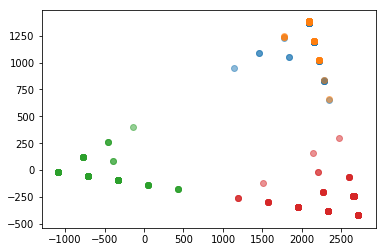

In [10]:
from sklearn.decomposition import PCA as sk_PCA

titanic_pca = sk_PCA().fit_transform(proximity_matrix)
# print(iris_pca.eigenvalues)
reduced_data = titanic_pca.T[:2].astype(float)
# print(reduced_data)
from matplotlib import pyplot

for target in set(car_labels):
    correct_target = (target == car_labels)
    pyplot.scatter(reduced_data[0][correct_target], reduced_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()